In [1]:
from Bern3D import *
import numpy as np
import numba
from numba.typed import List

In [3]:
foo = Bernoulli3Diffusion(theta=0.7, cost=-.005, sigma=(0.7,0.7), state_range=30)
# view_solution(foo)

0.23954803235172228
0.09692416398827208
0.05581479346223728
0.03835379784380566
0.03139753745800511
0.02494103603800002
0.020081256342975085
0.01539024769116315
0.01187991056206028
0.009079446095126564
0.006860586279803127
0.005176913695970176
0.00397767300309404
0.0031131288140729962
0.002402996189383888
0.0018422204894035232
0.0014074118346756315
0.0010732305338491122
0.0008175586052689976
0.0006224346214735998
0.0004737321004670836
0.00036055426204462115
0.0002745031866258074
0.00020892517375070696
0.00015926079767802914
0.0001267132716444852
9.952782105004943e-05
7.778164494487427e-05
6.0027276651219985e-05
4.6006012261567975e-05
3.5125455814855044e-05
2.6761262445385015e-05
2.0364566057251565e-05
1.548653518679277e-05
1.1772555782663119e-05
8.9473788847938e-06
6.799382662237008e-06
5.1667116121034695e-06
3.925931342685374e-06
3.3069934421980918e-06
2.6553652072713874e-06
2.06994784079928e-06
1.5934560865238367e-06
1.2192483813677768e-06
9.299778365168265e-07
45


In [11]:
foo.state_sample_value_max((1,1),10)

(0.9299443981767546, ListType[unicode_type]([x1, ...]))

In [12]:
zs = np.array([-3, -2, 0, 3])
Y = solution_as_array(foo)[:, :, zs + foo.state_range]
x = np.arange(-foo.state_range - .5, foo.state_range + 1)

In [13]:
z0s = np.linspace(-4,4,5, dtype=int)
rt_inc = [foo.performance((True, False), True, (0,0), z0, int(2e4))[0] for z0 in z0s]
rt_con = [foo.performance((True, True), True, (0,0), z0, int(2e4))[0] for z0 in z0s]

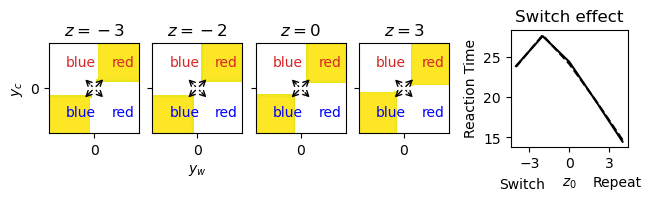

In [14]:
bigfig = plt.figure(layout='constrained')
fig_region, fig_rt = bigfig.subfigures(1, 2, width_ratios=(2.4, 1))

ymin = 0.6
ymax = np.max(Y)
axs = fig_region.subplots(1, len(zs), sharey=True)
for i, ax in enumerate(axs):
    ax.pcolormesh(x, x, Y[:,:,i], vmin=ymin, vmax=ymax)
    # ax.annotate('', (0,0), (7.5,7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple'
    # ax.annotate('', (0,0), (-7.5,-7.5), arrowprops=dict(arrowstyle='<-')) #color='tab:purple', 
    # ax.annotate('', (0,0), (-7.5,7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange
    # ax.annotate('', (0,0), (7.5,-7.5), arrowprops=dict(arrowstyle='<-', linestyle='--')) #color='tab:orange'
    # ax.annotate('blue',(-19,-19),color='blue')
    # ax.annotate('blue',(-19,15),color='tab:red')
    # ax.annotate('red',(12,15),color='tab:red')
    # ax.annotate('red',(12,-19),color='blue')
    ax.set_title(r'$z='+str(zs[i])+'$')
    ax.set_aspect(1)
    ax.set_xticks([0])
    ax.set_yticks([])
axs[0].set_yticks([0])
axs[0].set_ylabel(r'$y_c$')
axs[1].set_xlabel(r'$y_w$')

ax_rt = fig_rt.subplots()
ax_rt.plot(z0s, rt_con, color='black')
ax_rt.plot(z0s, rt_inc, linestyle='--', color='black')
ax_rt.set_aspect(np.diff(ax_rt.get_xlim())[0] / np.diff(ax_rt.get_ylim())[0])
# ax_rt.set_xlabel('Switch   ' + r'$z_0$' + '  Repeat')
ax_rt.set_xlabel(r'$z_0$')
ax_rt.set_ylabel('Reaction Time')
ax_rt.set_title('Switch effect')
ax_rt.annotate('Repeat', xy=(.7,-0.34), xycoords="axes fraction")
ax_rt.annotate('Switch', xy=(-.1,-0.35), xycoords="axes fraction")
ax_rt.set_xticks([-3,0,3])
